In [53]:
# loan data 
personal = pd.read_csv("Medibuddy insurance data personal details (1) (2).xlsx - Sheet1.csv")
price = pd.read_csv("Medibuddy Insurance Data Price (1) (2).xlsx - Medibuddy Insurance Data Price .csv")

# Merge on 'Policy no'
df = pd.merge(personal,price, on = "Policy no.")

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [25]:
# Clean data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [26]:
# Strip string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [27]:
print (df.columns)

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')


In [28]:
# Rename for consistency
df.rename(columns={
    "sex": "Gender",
    "bmi": "BMI",
    "charges in INR": "Amount",
    "region": "Geography"
}, inplace=True)

In [29]:
# BMI Category
df["BMI_Category"] = pd.cut(df["BMI"], bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=["Underweight", "Normal", "Overweight", "Obese"])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=["Gender", "smoker", "Geography", "BMI_Category"], drop_first=True)

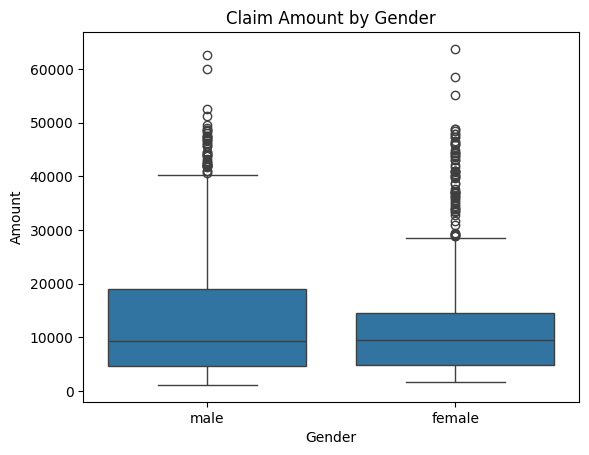

In [30]:
# Plot Gender vs Amount (use original df where 'Gender' is a string)
sns.boxplot(data=df, x="Gender", y="Amount")
plt.title("Claim Amount by Gender")
plt.show()

In [31]:
# 2. Average policy amount
print("Average policy cover amount:", df['Amount'].mean())

Average policy cover amount: 13270.422265141257


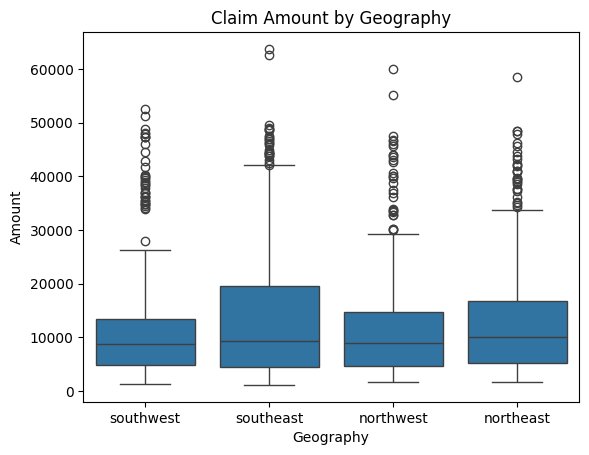

In [32]:
# 3. Geography vs Amount
sns.boxplot(data=df, x="Geography", y="Amount")
plt.title("Claim Amount by Geography")
plt.show()

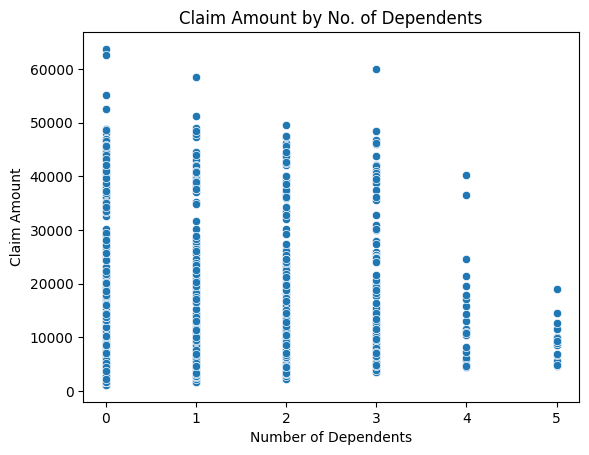

In [34]:
# 4. Dependents vs Amount
sns.scatterplot(data=df, x="children", y="Amount")
plt.title("Claim Amount by No. of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Claim Amount")
plt.show()


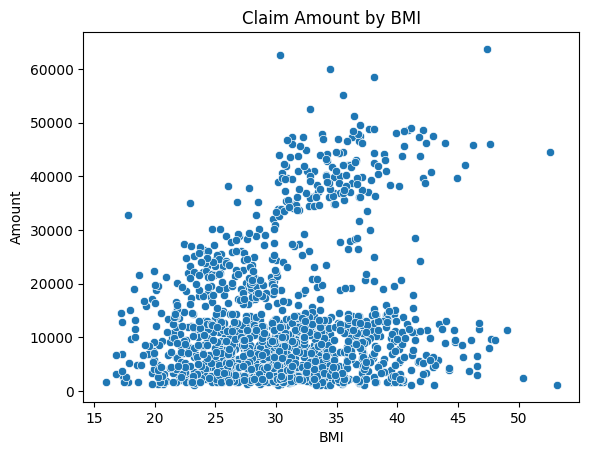

In [35]:
# 5. BMI vs Amount
sns.scatterplot(data=df, x="BMI", y="Amount")
plt.title("Claim Amount by BMI")
plt.show()

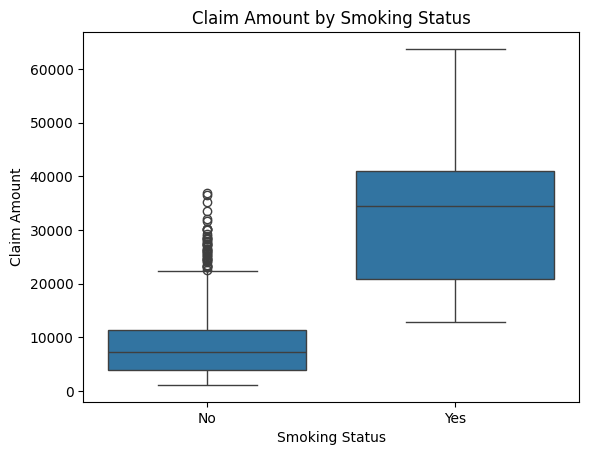

In [37]:
# 6. Smoker vs Non-smoker
df["smoker"] = df["smoker"].astype(str).str.capitalize()

sns.boxplot(data=df, x="smoker", y="Amount")
plt.title("Claim Amount by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Claim Amount")
plt.show()

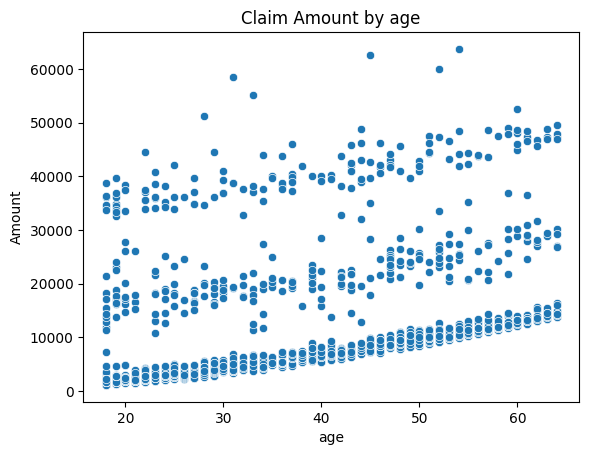

In [39]:
# 7. Age vs Amount
sns.scatterplot(data=df, x="age", y="Amount")
plt.title("Claim Amount by age")
plt.show()

In [40]:
# 8. Discounts based on BMI Category
print(df.groupby("BMI_Category")["Amount"].mean())

BMI_Category
Underweight     8657.620652
Normal         10404.900084
Overweight     11006.809989
Obese          15491.542238
Name: Amount, dtype: float64


In [42]:
#  One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=["Gender", "smoker", "Geography", "BMI_Category"], drop_first=True)

In [48]:
# Features and target
X = df_encoded.drop(columns=existing_cols_to_drop)
y = df_encoded["Amount"]

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
# Random Forest with hyperparameter tuning
params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [51]:
# Evaluation
print("Best parameters:", grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Best parameters: {'max_depth': 10, 'n_estimators': 150}
R² Score: 0.84491828795989
MAE: 2602.686609412764
